<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="https://www.editorialuoc.cat/deep-learning" target="_blank\">Deep learning: Principios y fundamentos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (UOC)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Capítulo 3: Ejemplo de redes neuronales completamente conectadas

En este ejemplo implementaremos una red neuronal completamente conectada utilizando la librería Keras y TensorFlow.

## 1. Carga de datos

El siguiente código carga los paquetes necesarios para el ejemplo y además lee los datos que utilizaremos para entrenar la red neuronal.

In [1]:
import numpy as np
import pickle

with open("../data/data.pickle", "rb") as f:
    data = pickle.load(f)

X = data["features"]
Y = data["labels"]

print("X shape is {} and sample data: {}".format(X.shape, X[0,:]))
print("Y shape is {} and sample data: {}".format(Y.shape, Y[0:10]))

X shape is (2000, 100) and sample data: [-3.80997895 -2.90418191 -2.73756329  1.93988891  2.27761932  2.29250939
  0.80657717 -0.18411067 -0.42838168 -0.74681727 -1.73050585  0.09787124
 -0.2622376  -0.47714865  0.09652312  0.02163088 -0.46442759 -0.44279175
  0.30522186  0.14028104 -0.81884    -0.1755735  -0.32787818 -0.01383203
 -0.92451808  0.05138323  0.92543899 -0.28682495 -0.75251595  0.21320492
 -0.23709864  0.94373726  0.69307069  0.5114043   0.40932795  0.15704461
  0.35092131 -0.14505174  0.04883884  0.19069857 -0.36449453  0.05761488
  0.03058404  0.37526033  0.16429508  0.17789281  0.12090412  0.12617789
  0.00622596  0.1119326  -0.20559843 -0.14971844 -0.25820982  0.29480069
 -0.09804937  0.02398129 -0.03289546 -0.23438531  0.33442494 -0.36561303
 -0.17030636  0.1216377  -0.02450097  0.19675075  0.04785413  0.0186243
  0.08853324  0.34336898 -0.09194883  0.03168607  0.16912165 -0.19320273
  0.16965356  0.01574452 -0.02055554 -0.06386753 -0.01774633 -0.05936183
 -0.3109211 

## 2. Redes neuronales utilizando Keras

A continuación definiremos una red neuronal completamente conectada utilizando la librería [Keras](https://keras.io/).

El siguiente código permite definir una red neuronal completamente conectada a partir de una lista que contiene el número de neuronas que debe tener cada capa de la red. Las primeras capas deben tener función de activación `relu` y la última capa debe tener función de activación `sigmoid`. Todas ellas tienen que tener `kernel_initializer="random_normal"` y `bias_initializer="zeros"`.

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

def keras_model(layers_dims, learning_rate):
    """
    Crea, utilizando Keras, una red neuronal de L capas completamente conectadas donde las L-1 primeras capas
    tienen función de activación relu y la última capa tiene función de activación sigmoid.
    
    Argumentos:
    layers_dims -- lista de longitud (número de capas + 1) que contiene el número de variables y el número 
                    de neuronas en cada capa, 
    learning_rate -- velocidad de aprendizaje para aplicar el método del descenso del gradiente
    
    Devuelve:
    modelo -- objeto de Keras que representa la red neuronal
    """
    
    L = len(layers_dims)
    
    model = Sequential()
    model.add(Dense(layers_dims[1], input_shape=(layers_dims[0],), activation="relu"))
    
    for l in range(2, L-1):
        model.add(Dense(layers_dims[l], activation="relu", kernel_initializer="random_normal",
                bias_initializer="zeros"))
    
    model.add(Dense(layers_dims[L-1], activation="sigmoid", kernel_initializer="random_normal",
                bias_initializer="zeros"))
    
    model.compile(optimizer=SGD(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

Using TensorFlow backend.


## 3. Entrenamiento de la red neuronal

Con todas las funciones implementadas anteriormente es posible entrenar una red neuronal completamente conectada con cualquier número de capas y cualquier número de neuronas en cada capa.

A continuación definimos la estructura de capas que tendrá la red neuronal.

In [3]:
layers_dims = [100, 20, 5, 1]

Para entrenar la red neuronal que hemos construido utilizando Keras debemos ejecutar el siguiente código:

In [4]:
model = keras_model(layers_dims=layers_dims, learning_rate=0.1)
history = model.fit(X, Y, validation_split=0.2, epochs=250, batch_size=X.shape[0], verbose=2)

Train on 1600 samples, validate on 400 samples
Epoch 1/250
 - 0s - loss: 0.6945 - acc: 0.3381 - val_loss: 0.6943 - val_acc: 0.3250
Epoch 2/250
 - 0s - loss: 0.6942 - acc: 0.3575 - val_loss: 0.6940 - val_acc: 0.3475
Epoch 3/250
 - 0s - loss: 0.6939 - acc: 0.3713 - val_loss: 0.6938 - val_acc: 0.3875
Epoch 4/250
 - 0s - loss: 0.6937 - acc: 0.4019 - val_loss: 0.6937 - val_acc: 0.4150
Epoch 5/250
 - 0s - loss: 0.6935 - acc: 0.4356 - val_loss: 0.6936 - val_acc: 0.4300
Epoch 6/250
 - 0s - loss: 0.6934 - acc: 0.4631 - val_loss: 0.6935 - val_acc: 0.4475
Epoch 7/250
 - 0s - loss: 0.6933 - acc: 0.4819 - val_loss: 0.6934 - val_acc: 0.4525
Epoch 8/250
 - 0s - loss: 0.6933 - acc: 0.4856 - val_loss: 0.6934 - val_acc: 0.4650
Epoch 9/250
 - 0s - loss: 0.6932 - acc: 0.4925 - val_loss: 0.6933 - val_acc: 0.4650
Epoch 10/250
 - 0s - loss: 0.6931 - acc: 0.4975 - val_loss: 0.6933 - val_acc: 0.4700
Epoch 11/250
 - 0s - loss: 0.6931 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4700
Epoch 12/250
 - 0s - loss: 

Epoch 97/250
 - 0s - loss: 0.2736 - acc: 0.9425 - val_loss: 0.2815 - val_acc: 0.9250
Epoch 98/250
 - 0s - loss: 0.2655 - acc: 0.9438 - val_loss: 0.2745 - val_acc: 0.9250
Epoch 99/250
 - 0s - loss: 0.2575 - acc: 0.9469 - val_loss: 0.2677 - val_acc: 0.9225
Epoch 100/250
 - 0s - loss: 0.2498 - acc: 0.9469 - val_loss: 0.2611 - val_acc: 0.9225
Epoch 101/250
 - 0s - loss: 0.2422 - acc: 0.9488 - val_loss: 0.2548 - val_acc: 0.9225
Epoch 102/250
 - 0s - loss: 0.2349 - acc: 0.9481 - val_loss: 0.2486 - val_acc: 0.9225
Epoch 103/250
 - 0s - loss: 0.2279 - acc: 0.9488 - val_loss: 0.2427 - val_acc: 0.9250
Epoch 104/250
 - 0s - loss: 0.2211 - acc: 0.9494 - val_loss: 0.2370 - val_acc: 0.9225
Epoch 105/250
 - 0s - loss: 0.2146 - acc: 0.9500 - val_loss: 0.2316 - val_acc: 0.9225
Epoch 106/250
 - 0s - loss: 0.2083 - acc: 0.9506 - val_loss: 0.2264 - val_acc: 0.9200
Epoch 107/250
 - 0s - loss: 0.2023 - acc: 0.9513 - val_loss: 0.2214 - val_acc: 0.9200
Epoch 108/250
 - 0s - loss: 0.1966 - acc: 0.9538 - val_lo

Epoch 193/250
 - 0s - loss: 0.0717 - acc: 0.9719 - val_loss: 0.1039 - val_acc: 0.9500
Epoch 194/250
 - 0s - loss: 0.0713 - acc: 0.9719 - val_loss: 0.1036 - val_acc: 0.9500
Epoch 195/250
 - 0s - loss: 0.0709 - acc: 0.9731 - val_loss: 0.1032 - val_acc: 0.9500
Epoch 196/250
 - 0s - loss: 0.0706 - acc: 0.9731 - val_loss: 0.1028 - val_acc: 0.9500
Epoch 197/250
 - 0s - loss: 0.0702 - acc: 0.9731 - val_loss: 0.1025 - val_acc: 0.9500
Epoch 198/250
 - 0s - loss: 0.0698 - acc: 0.9731 - val_loss: 0.1021 - val_acc: 0.9500
Epoch 199/250
 - 0s - loss: 0.0695 - acc: 0.9731 - val_loss: 0.1018 - val_acc: 0.9500
Epoch 200/250
 - 0s - loss: 0.0691 - acc: 0.9731 - val_loss: 0.1014 - val_acc: 0.9500
Epoch 201/250
 - 0s - loss: 0.0688 - acc: 0.9731 - val_loss: 0.1011 - val_acc: 0.9500
Epoch 202/250
 - 0s - loss: 0.0684 - acc: 0.9731 - val_loss: 0.1008 - val_acc: 0.9500
Epoch 203/250
 - 0s - loss: 0.0681 - acc: 0.9744 - val_loss: 0.1005 - val_acc: 0.9500
Epoch 204/250
 - 0s - loss: 0.0678 - acc: 0.9744 - val

El siguiente código permite calcular el tiempo que tarda la red neuronal en entrenarse.

In [5]:
%%timeit
model = keras_model(layers_dims=layers_dims, learning_rate=0.1)
model.fit(X, Y, epochs=250, batch_size=X.shape[0], verbose=0)

1.13 s ± 42.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


En este último fragmento de código veremos como emplear el objecto `history` para ver la evolución del proceso de entrenamniento. 

En primer lugar, veremos la información que contiene dicho objeto.

In [6]:
# Ver los datos contenidos en 'history'
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Y finalmente, visualizaremos dos gráficos para ver como evoluciona la precisión y el error durante el proceso de entrenamiento.

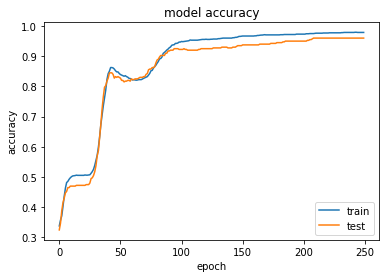

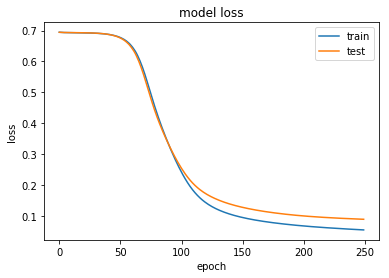

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# Visualizamos la evolución de la accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Visualizamos la evolución del error cometido por la red
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()